In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
import logging
logging.getLogger('tensorflow').setLevel(logging.INFO)
tf.autograph.set_verbosity(0)

## Neuron without activation - Regression/Linear Model

### Dataset

(2, 1) (2, 1)


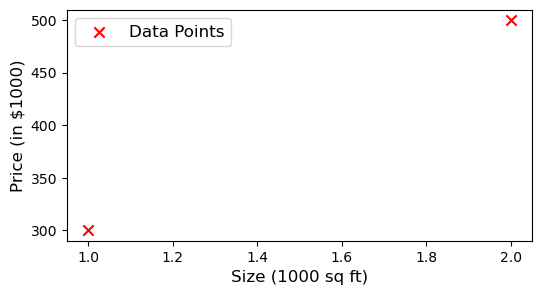

In [28]:
X_train = np.array([[1],[2]], dtype=np.float32)
Y_train = np.array([[300], [500]], dtype=np.float32)
print (X_train.shape, Y_train.shape)

fig,ax=plt.subplots(figsize=(6,3))
ax.scatter(x=X_train, y=Y_train, marker='x', s=55, color='r')
ax.set_xlabel('Size (1000 sq ft)', fontsize='large')
ax.set_ylabel('Price (in $1000)', fontsize='large')
ax.legend(['Data Points'], fontsize='large');

### Regression/Linear model

The function implemented by a neuron with no activation is the same as in Course 1, linear regression:
$$ f_{\mathbf{w},b}(x^{(i)}) = \mathbf{w}\cdot x^{(i)} + b \tag{1}$$

Let's define a layer with one neuron and no activation using `tf.keras`.

In [37]:
linear_layer = tf.keras.layers.Dense(units=1, activation='linear', )

There will be no weights as they are not instantiated yet.

In [38]:
linear_layer.get_weights() 

[]

Passing the data will trigger random instantiation of $w$ and $b$. Specifically, weights are randomly initialized to small numbers and the bias defaults to being initialized to zero.

In [100]:
a1 = linear_layer(X_train[0].reshape(1,1))
print (a1)

tf.Tensor([[100.]], shape=(1, 1), dtype=float32)


In [101]:
w,b = linear_layer.get_weights()
print (w,b)

[[200.]] [100.]


Now, let's set the $w$ and $b$ using `.set_weights()` method

In [46]:
set_w = np.array([[200]]) # (1,1)
set_b = np.array([100])   # (1,)
print (set_w.shape, set_b.shape)

linear_layer.set_weights([set_w, set_b])
print (linear_layer.get_weights())

(1, 1) (1,)
[array([[200.]], dtype=float32), array([100.], dtype=float32)]


Let's pass the input to model, and get the predicted output.

In [62]:
a1 = linear_layer(X_train[0].reshape(1,1))
print (a1)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)


In [61]:
prediction_tf = linear_layer(X_train)
print (prediction_tf)

tf.Tensor(
[[300.]
 [500.]], shape=(2, 1), dtype=float32)


## Neuron with sigmoid function

In [102]:
X_train = np.array([0, 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1, 1)
Y_train = np.array([0, 0, 0, 1, 1, 1], dtype=np.float32).reshape(-1, 1)
print (X_train.shape, Y_train.shape)

(6, 1) (6, 1)


In [103]:
pos = Y_train==1
neg = Y_train==0

Text(0.5, 1.0, 'one variable plot')

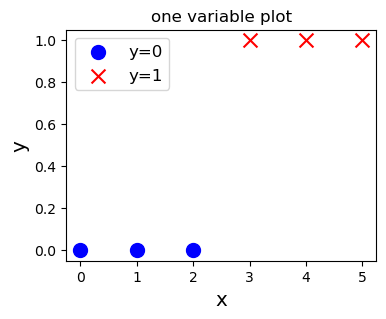

In [104]:
fig, ax = plt.subplots(1,1, figsize=(4,3))
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, c='blue', label='y=0')
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=100, c='r', label='y=1')
ax.legend(fontsize='large')
ax.set_xlabel('x', fontsize='x-large')
ax.set_ylabel('y', fontsize='x-large')
ax.set_title('one variable plot', fontsize='large')

### Logistic Neuron

The function implemented by a neuron/unit with a sigmoid activation is the same as in Course 1, logistic  regression:
$$ f_{\mathbf{w},b}(x^{(i)}) = g(\mathbf{w}x^{(i)} + b) \tag{2}$$
where $$g(x) = sigmoid(x)$$ 


Let's define a single layer with one neuron with sigmoid as the activation function. We can use the `Sequential` model to construct multi-layer models.

In [105]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_dim=1, activation='sigmoid', name='L1')
])

`model.summary()` shows the layers and number of parameters in the model. There is only one layer `L1` in this model and that layer has only one unit. The unit has two parameters, 𝑤 and 𝑏.

In [106]:
model.summary() # L1 layer => One unit/neuron only 2 params (w1, b1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [95]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print (w,b)

[[1.1503018]] [0.]


Let's set $w$ and $b$ to some known values and check the model.

In [97]:
set_w = np.array([[2]])
set_b = np.array([-4.5])

logistic_layer.set_weights([set_w, set_b])
print (logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


Let's compare equation (2) to the layer output.

In [98]:
logistic_layer(X_train)

<tf.Tensor: shape=(6, 1), dtype=float32, numpy=
array([[0.01098694],
       [0.07585818],
       [0.37754068],
       [0.8175745 ],
       [0.97068775],
       [0.99592984]], dtype=float32)>

In [107]:
np.where(logistic_layer(X_train)>=0.5, 1, 0)

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1]])